#Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, classification_report, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score



**Matrix column entries (attributes):**

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

Five measures of variation in Frequency

MDVP:Jitter(%) - Percentage of cycle-to-cycle variability of the period duration

MDVP:Jitter(Abs) - Absolute value of cycle-to-cycle variability of the period duration

MDVP:RAP - Relative measure of the pitch disturbance

MDVP:PPQ - Pitch perturbation quotient

Jitter:DDP - Average absolute difference of differences between jitter cycles
Six measures of variation in amplitude

MDVP:Shimmer - Variations in the voice amplitdue

MDVP:Shimmer(dB) - Variations in the voice amplitdue in dB

Shimmer:APQ3 - Three point amplitude perturbation quotient measured against the average of the three amplitude

Shimmer:APQ5 - Five point amplitude perturbation quotient measured against the average of the three amplitude

MDVP:APQ - Amplitude perturbation quotient from MDVP

Shimmer:DDA - Average absolute difference between the amplitudes of consecutive periods

Two measures of ratio of noise to tonal components in the voice

NHR - Noise-to-harmonics Ratio and
HNR - Harmonics-to-noise Ratio
status - Health status of the subject (one) - Parkinson's, (zero) - healthy

Two nonlinear dynamical complexity measures

RPDE - Recurrence period density entropy

D2 - correlation dimension

DFA - Signal fractal scaling exponent

Three nonlinear measures of fundamental frequency variation

spread1 - discrete probability distribution of occurrence of relative semitone variations

spread2 - Three nonlinear measures of fundamental frequency variation

PPE - Entropy of the discrete probability distribution of occurrence of relative semitone variations


#Load and Explore the Dataset

Imported Dataset from KAGGLE: https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set/data

In [ ]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**head() Method** Shows the List of First 5 Records

In [ ]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


**tail() Method** Shows the Last 5 Records

# Exploratory Data Analysis

In [ ]:
print(df.shape)

(195, 24)


**shape method** returns a tuple containing to show the
number of rows and columns of the DataFrame

which is
**195 rows and 24 columns**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

**info() method** displays information about the structure of the DataFrame such as the number of rows and columns, the data types of each column, and the number of non-null values ​​in each column .

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


**Describe() method** returns 8 description of the data in
the DataFrame such as the mean, min max values, quartiles,
count, and standard deviation.


In [ ]:
df.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0



The **isnull().sem()** Check for Missing value in a DataFrame,
**No missing value found**.

In [ ]:
df.duplicated().sum()

0

**Duplicated method** detect the Number of Duplicate rows, **no
duplicates found from the output 0.**

# Dropping irrelevent features

In [ ]:
df.drop(['name'], axis=1, inplace=True)

**Dropping irrelevant features** to improve data performance
and efficiency and limit only useful that helps with decision
making process

# Displaying Count of Status
*   1 = Parkinson's Diseaese
*   0 = Healthy



In [ ]:
y = df['status']
y.value_counts(normalize=True)

,proportion
status,
1,0.753846
0,0.246154


**Splitting dependent and independent classes**, and
determining classifier class into ‘y’ from the column ‘status’.
 Displaying from count method the status of patients in the
dataset, and normalize results into either:

- 1 = Parkinson's Disease

- 0 = Healthy

we can conclude that 75% dignosed with PD, 25% Healthy.

# Visualizations Of The Dataset


*   Correlation Matrix
*   Histogram
* Pie Chart
* Bar Chart




Display **Correlation Heatmap** with the features.


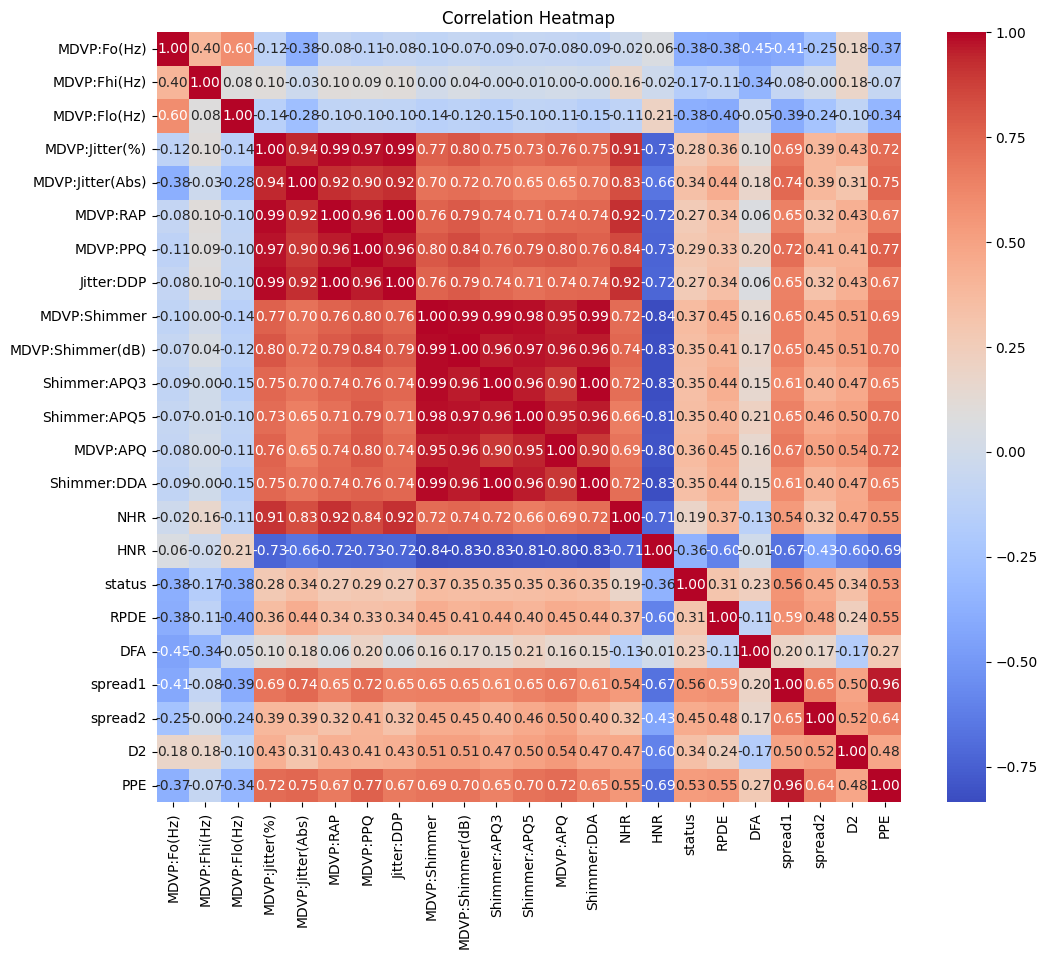

In [ ]:
# correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Display Visual **Histogram** of the Status column which represent

*   How many were dignosed PD
*   How many were Healthy

<Axes: >

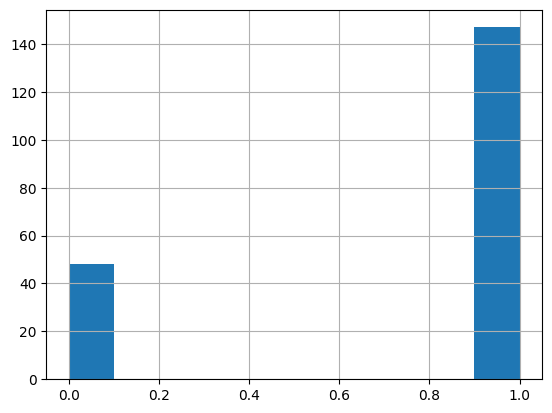

In [ ]:
# Histogram
df['status'].hist()

Display the **Histogram** of the “status” column showing the number of people with Parkinson’s disease compared to the healthy people.
• A value of **1 indicates** that there are about **140-150 people** with Parkinson’s disease.
• A value of **0 indicates** that there are about **50 healthy** people.

Display **Pie Chart** Visualisation Figure

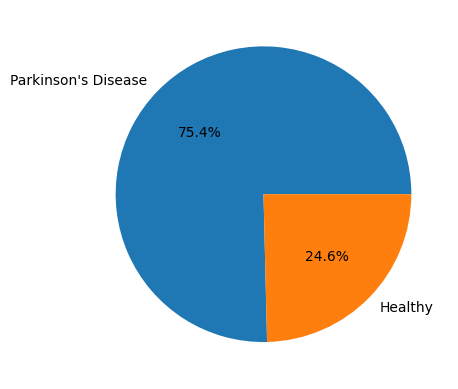

In [ ]:
# Pie Chart
# Count the values in the status column
status_counts = df['status'].value_counts()

# Plot the pie chart
plt.pie(status_counts, labels=[ "Parkinson's Disease", "Healthy"], autopct="%1.1f%%")
plt.show()

This graph shows the percentage of Parkinson's patients compared to healthy people. We can see that about **75.4%** of cases belong to the **Parkinson's patients** category, while the **healthy people** category constitutes only **24.6%**.

Display **Bar Chart**.

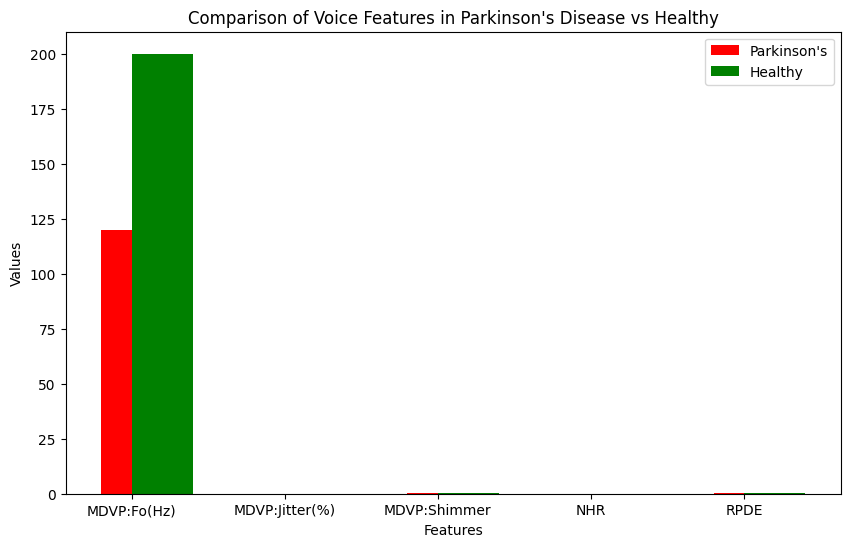

In [ ]:
# Bar Chart
features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'RPDE']

values_parkinsons = [120, 0.02, 0.3, 0.1, 0.5]
values_healthy = [200, 0.01, 0.15, 0.05, 0.2]

x = range(len(features))

plt.figure(figsize=(10, 6))
plt.bar(x, values_parkinsons, width=0.4, label='Parkinson\'s', color='red', align='center')
plt.bar(x, values_healthy, width=0.4, label='Healthy', color='green', align='edge')

plt.xticks(x, features)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Comparison of Voice Features in Parkinson\'s Disease vs Healthy')
plt.legend()
plt.show()

The **MDVP:Fo(Hz)** column represents the average pitch of the voice, which is higher in healthy people due to better voice control. It is lower in Parkinson's patients because the disease affects the vocal muscles, making it difficult to control the vocal cords.

<ipython-input-132-04aff4fd9ca6>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Features', y='Values', hue='status', data=df_melted, ci=None)


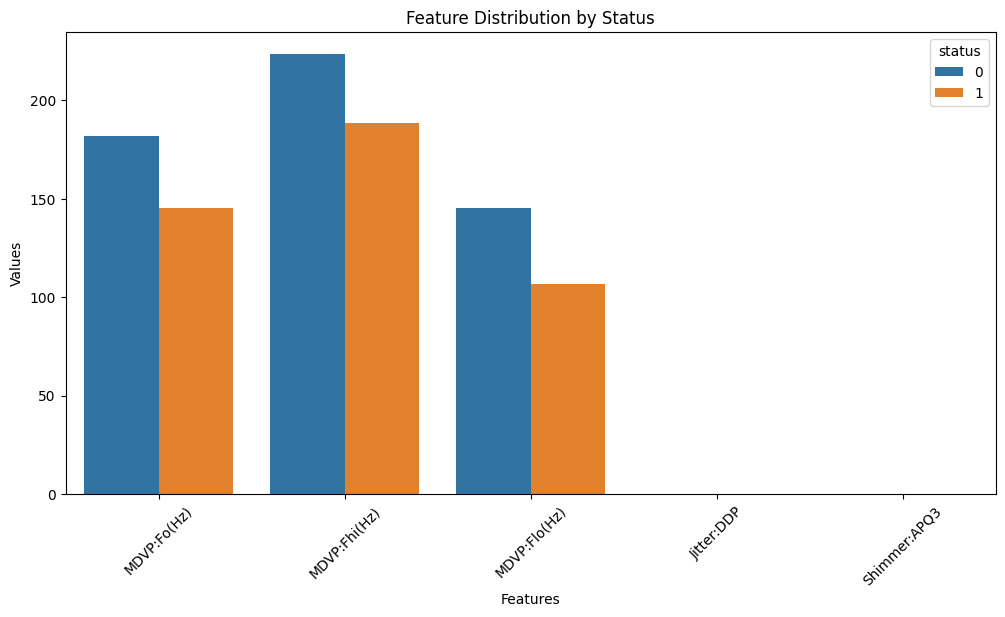

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'Jitter:DDP', 'Shimmer:APQ3']

# Reshape the dataframe
df_melted = df.melt(id_vars='status', value_vars=features, var_name='Features', value_name='Values')

# Bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Values', hue='status', data=df_melted, ci=None)
plt.xticks(rotation=45)
plt.title('Feature Distribution by Status')
plt.show()



# Splitting the Dependent and Independent features
# Splitting Training and Testing


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler


X = df.drop(['status'], axis=1)
y = df['status']

# Split the data into 60% training, 20% validation, and 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42)  # 60% training, 40% temp
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)  # Split 40% into 50% validation and 50% test


# Check the shape of the SMOTE resampled data
print("Training set after SMOTE:", X_train.shape)
print("Validation set shape:", X_valid.shape)
print("Test set shape:", X_test.shape)

Training set after SMOTE: (117, 22)
Validation set shape: (39, 22)
Test set shape: (39, 22)


The data was split into **feature (X),** **target variable (y),** and then further split into training and test sets. The shape of the new sets was then printed.



*   The Train portion has 156 rows, 22 columns
*   The Test portion has 39 rows, 22 columns



# Building Classification Models
* Logistic Regression

* K-NN

* Decison Tree

* Random Forest

* Naive Bayes

* SVM

# Evaluating Accuracy Metrics


*   Accuracy
*   Precision
*   Recall
*   F1

**Logistic Regression**

Evaluated with:

1.   Accuracy
2.   Precision
3.   Recall
4.   F1



In [ ]:

from sklearn.linear_model import LogisticRegression

# Fit a logistic regression model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)


# Calculate evaluation metrics
accuracy_model_lr = accuracy_score(y_pred_lr, y_test)
precision_model_lr = precision_score(y_test, y_pred_lr)
recall_model_lr = recall_score(y_test, y_pred_lr)
f1_score_model_lr = f1_score(y_test, y_pred_lr)



# Print the evaluation metrics
print("Accuracy:", accuracy_model_lr,
      "\nPrecision:",precision_model_lr,
      "\nRecall:", recall_model_lr,
      "\nF1 Score:", f1_score_model_lr)


Accuracy: 0.7948717948717948 
Precision: 0.8 
Recall: 0.9230769230769231 
F1 Score: 0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K-NN**

Evaluated with:

1.   Accuracy
2.   Precision
3.   Recall
4.   F1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fit KNN model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = model_knn.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics
print("Accuracy:", accuracy_knn,
      "\nPrecision:",precision_knn,
      "\nRecall:", recall_knn,
      "\nF1 Score:", f1_score_knn)

Accuracy: 0.7692307692307693 
Precision: 0.7575757575757576 
Recall: 0.9615384615384616 
F1 Score: 0.847457627118644


**Deciaion Tree**

Evaluated with:

1.   Accuracy
2.   Precision
3.   Recall
4.   F1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Fit a Decision Tree model

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = model_tree.predict(X_test)

# Calculate evaluation metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)

# Print the evaluation metrics
print("Accuracy:", accuracy_tree,
      "\nPrecision:",precision_tree,
      "\nRecall:", recall_tree,
      "\nF1 Score:", f1_score_tree,)

Accuracy: 0.8717948717948718 
Precision: 0.92 
Recall: 0.8846153846153846 
F1 Score: 0.9019607843137255


**Random Forest**

Evaluated with:

1.   Accuracy
2.   Precision
3.   Recall
4.   F1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit a random forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)


# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)


# Print the evaluation metrics
print("Accuracy:", accuracy_rf,
      "\nPrecision:",precision_rf,
      "\nRecall:", recall_rf,
      "\nF1 Score:", f1_score_rf)

Accuracy: 0.9230769230769231 
Precision: 0.896551724137931 
Recall: 1.0 
F1 Score: 0.9454545454545454


**Naive Bayes**

Evaluated with:

1.   Accuracy
2.   Precision
3.   Recall
4.   F1


In [ ]:
# Fit a naive bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
nb_pred = nb_model.predict(X_test)

# Calculate evaluation metrics
accuracy_nb_model = accuracy_score(y_test, nb_pred)
precision_nb_model = precision_score(y_test, nb_pred)
recall_nb_model = recall_score(y_test, nb_pred)
f1_score_nb_model = f1_score(y_test, nb_pred)

# Print the evaluation metrics
print("Accuracy :", accuracy_nb_model,
      "\nPrecision:", precision_nb_model,
      "\nRecall:", recall_nb_model,
      "\nF1 Score:", f1_score_nb_model)


Accuracy : 0.7435897435897436 
Precision: 0.9 
Recall: 0.6923076923076923 
F1 Score: 0.782608695652174


**Support Vector Machine (SVM)**

Evaluated with:

1.   Accuracy
2.   Precision
3.   Recall
4.   F1


In [ ]:
# Fit support vector machine model
svm_model = SVC()
svm_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)


# Calculate evaluation metrics
accuracy_svm_model = accuracy_score(y_test, y_pred_svm)
precision_svm_model = precision_score(y_test, y_pred_svm)
recall_svm_model = recall_score(y_test, y_pred_svm)
f1_score_svm = f1_score(y_test, y_pred_svm)


# Print the evaluation metrics
print("Accuracy :", accuracy_svm_model,
      "\nPrecision:",precision_svm_model,
      "\nRecall:", recall_svm_model,
      "\nF1 Score:", f1_score_svm)

Accuracy : 0.7435897435897436 
Precision: 0.7222222222222222 
Recall: 1.0 
F1 Score: 0.8387096774193549


# Enhancing / Improving Initial Results

reform splitting the data into 3 sets, Train, Test, and Validation and
Handle the Imbalanced Data with SMOTE (Over Sampling), and apply Normalization.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Apply SMOTE to the training data (only on training set to avoid data leakage)
smote = SMOTE(random_state=42)
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

# Normliazation Scale the features using MinMaxScaler
minmax = MinMaxScaler()
X_smote_train_scaled = minmax.fit_transform(X_smote_train)
X_valid_scaled = minmax.transform(X_valid)  # Use the same scaler fitted on the training set
X_test_scaled = minmax.transform(X_test)  # Use the same scaler fitted on the training set

# Check the shape of the SMOTE resampled data
print("Training set after SMOTE:", X_smote_train_scaled.shape)
print("Validation set shape:", X_valid_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set after SMOTE: (178, 22)
Validation set shape: (39, 22)
Test set shape: (39, 22)


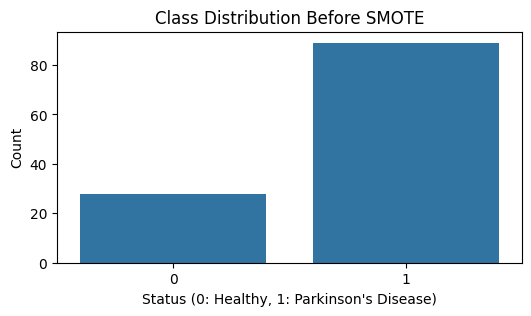

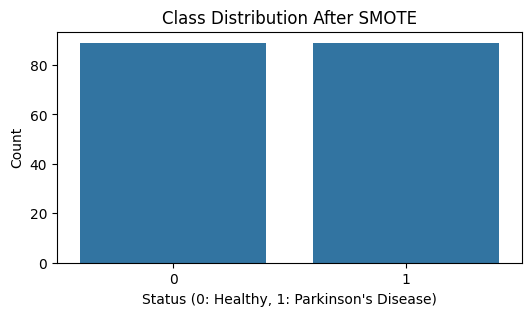

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution before SMOTE
plt.figure(figsize=(6, 3))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Status (0: Healthy, 1: Parkinson's Disease)")
plt.ylabel("Count")
plt.show()

# Plot class distribution after SMOTE
plt.figure(figsize=(6, 3))
sns.countplot(x=y_smote_train)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Status (0: Healthy, 1: Parkinson's Disease)")
plt.ylabel("Count")
plt.show()

In [ ]:
# Logistic Regression model
LR = LogisticRegression()

# Step 1: Train the model with the SMOTE data
LR.fit(X_smote_train_scaled, y_smote_train)

# Step 2: Make predictions on the scaled test set
y_pred_LR_smote = LR.predict(X_test_scaled)


accuracy_lr = accuracy_score(y_test, y_pred_LR_smote)
precision_lr = precision_score(y_test, y_pred_LR_smote)
recall_lr = recall_score(y_test, y_pred_LR_smote)
f1_lr = f1_score(y_test, y_pred_LR_smote)
train_accuracy_lr = LR.score(X_smote_train_scaled, y_smote_train)

print("Logistic Regression Test Set Performance:")
print("Accuracy:", accuracy_lr,
      "\nPrecision:",precision_lr,
      "\nRecall:", recall_lr,
      "\nF1 Score:", f1_lr,
      "\nTrain: ", train_accuracy_lr)

Logistic Regression Test Set Performance:
Accuracy: 0.7692307692307693 
Precision: 0.7931034482758621 
Recall: 0.8846153846153846 
F1 Score: 0.8363636363636363 
Train:  0.797752808988764


In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_smote_train_scaled, y_smote_train)
# Step 2: Evaluate model on the test set (final evaluation)
y_pred_KNN_smote = KNN.predict(X_test_scaled)
# Calculate evaluation metrics on the test set
accuracy_knn = accuracy_score(y_test, y_pred_KNN_smote)
precision_knn = precision_score(y_test, y_pred_KNN_smote)
recall_knn = recall_score(y_test, y_pred_KNN_smote)
f1_score_knn = f1_score(y_test, y_pred_KNN_smote)
train_accuracy_knn = KNN.score(X_smote_train_scaled, y_smote_train)
# Print the evaluation metrics for the test set
print("\nKNN Test Set Performance:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_score_knn:.4f}")
print(f"Train Accuracy: {train_accuracy_knn:.4f}")



KNN Test Set Performance:
Accuracy: 0.9231
Precision: 0.9600
Recall: 0.9231
F1 Score: 0.9412
Train Accuracy: 0.9326


In [ ]:
# Train Decision Tree model using the SMOTE-resampled training data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_smote_train_scaled, y_smote_train)

# Evaluate the model on the test set
y_pred_dt_smote = dt_model.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt_smote)
precision_dt = precision_score(y_test, y_pred_dt_smote)
recall_dt = recall_score(y_test, y_pred_dt_smote)
f1_score_dt = f1_score(y_test, y_pred_dt_smote)
train_accuracy_dt = dt_model.score(X_smote_train_scaled, y_smote_train)

# Print the evaluation metrics for the test set
print("Decision Tree Test Set Performance:")
print("Accuracy:", accuracy_dt,
      "\nPrecision:",precision_dt,
      "\nRecall:", recall_dt,
      "\nF1 Score:", f1_score_dt,
      "\nTrain Accuracy: ", train_accuracy_dt)


Decision Tree Test Set Performance:
Accuracy: 0.8974358974358975 
Precision: 0.9230769230769231 
Recall: 0.9230769230769231 
F1 Score: 0.9230769230769231 
Train Accuracy:  1.0


In [ ]:
# Train Random Forest model using the SMOTE-resampled training data
rfc_model = RandomForestClassifier()
rfc_model.fit(X_smote_train_scaled, y_smote_train)

# Step 1: Evaluate the model on the test set
y_pred_rfc_smote = rfc_model.predict(X_test_scaled)

# Step 2: Calculate evaluation metrics on the test set
accuracy_rfc = accuracy_score(y_test, y_pred_rfc_smote)
precision_rfc = precision_score(y_test, y_pred_rfc_smote)
recall_rfc = recall_score(y_test, y_pred_rfc_smote)
f1_score_rfc = f1_score(y_test, y_pred_rfc_smote)
train_accuracy_rfc = rfc_model.score(X_smote_train_scaled, y_smote_train)

# Step 3: Print the evaluation metrics for the test set
print("Random Forest Test Set Performance:")
print("Accuracy:", accuracy_rfc,
      "\nPrecision:",precision_rfc,
      "\nRecall:", recall_rfc,
      "\nF1 Score:", f1_score_rfc,
      "\nTrain Accuracy: ", train_accuracy_rfc)


Random Forest Test Set Performance:
Accuracy: 0.8717948717948718 
Precision: 0.8888888888888888 
Recall: 0.9230769230769231 
F1 Score: 0.9056603773584906 
Train Accuracy:  1.0


In [ ]:
# Train Naive Bayes model using the SMOTE-resampled training data
NB = GaussianNB()
NB.fit(X_smote_train_scaled, y_smote_train)

# Step 1: Predict on the test set
y_pred_nb_smote = NB.predict(X_test_scaled)

# Step 2: Calculate evaluation metrics on the test set
accuracy_nb = accuracy_score(y_test, y_pred_nb_smote)
precision_nb = precision_score(y_test, y_pred_nb_smote)
recall_nb = recall_score(y_test, y_pred_nb_smote)
f1_score_nb = f1_score(y_test, y_pred_nb_smote)
train_accuracy_nb = NB.score(X_smote_train_scaled, y_smote_train)

# Step 3: Print the evaluation metrics for the test set
print("Naive Bayes Test Set Performance:")
print("Accuracy:", accuracy_nb,
      "\nPrecision:",precision_nb,
      "\nRecall:", recall_nb,
      "\nF1 Score:", f1_score_nb,
      "\nTrain Accuracy: ",train_accuracy_nb)


Naive Bayes Test Set Performance:
Accuracy: 0.7435897435897436 
Precision: 0.8636363636363636 
Recall: 0.7307692307692307 
F1 Score: 0.7916666666666666 
Train Accuracy:  0.7808988764044944


In [ ]:
# Train SVM model using the SMOTE-resampled training data
svm = SVC(kernel='rbf', gamma=1, C=10)  # Using a kernel for SVM
svm.fit(X_smote_train_scaled, y_smote_train)

# Step 1: Predict on the test set
y_pred_svm_smote = svm.predict(X_test_scaled)

# Step 2: Calculate evaluation metrics on the test set
accuracy_svm = accuracy_score(y_test, y_pred_svm_smote)
precision_svm = precision_score(y_test, y_pred_svm_smote)
recall_svm = recall_score(y_test, y_pred_svm_smote)
f1_score_svm = f1_score(y_test, y_pred_svm_smote)
train_accuracy_svm = svm.score(X_smote_train_scaled, y_smote_train)

# Step 3: Print the evaluation metrics for the test set
print("Support Vector Machine Test Set Performance:")
print("Accuracy:", accuracy_svm,
      "\nPrecision:",precision_svm,
      "\nRecall:", recall_svm,
      "\nF1 Score:", f1_score_svm,
      "\nTrain Accuracy: ", train_accuracy_svm)


Support Vector Machine Test Set Performance:
Accuracy: 0.9487179487179487 
Precision: 0.9285714285714286 
Recall: 1.0 
F1 Score: 0.9629629629629629 
Train Accuracy:  0.9775280898876404


# Confusion Matrix

**The results of applying Confusion Matrix to the Best Algorithms:**


True Negatives:
The model correctly classified healthy individuals as healthy.


True Positives:
The model correctly classified Parkinson’s cases as Parkinson’s.


False Positives:
The model mistakenly classified healthy individuals as having Parkinson’s.


False Negatives:
The model didn’t miss any Parkinson’s cases.


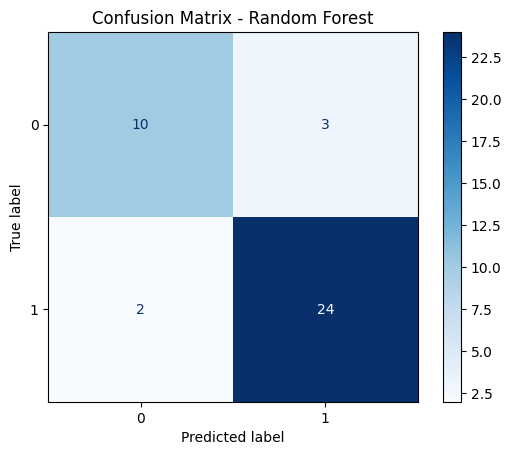

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rfc_smote)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0 = Healthy, 1 = Parkinson's Diseaese
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

The **confusion matrix** shows the performance of the Random Forest model in classifying the data.

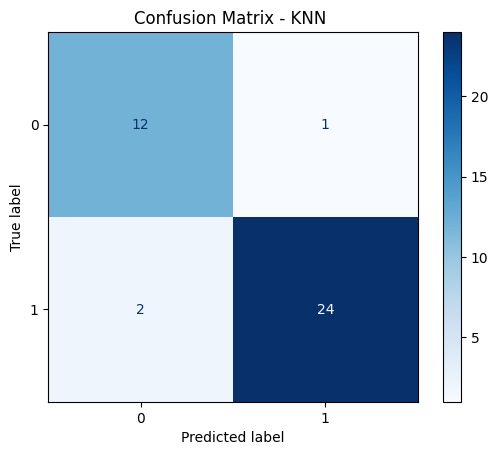

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_KNN_smote)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0 = Healthy, 1 = Parkinson's Diseaese
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - KNN ")
plt.show()

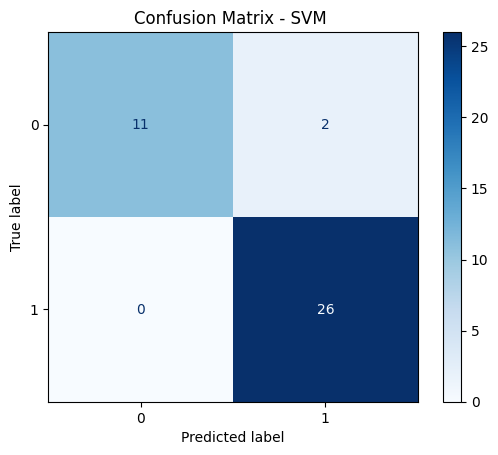

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_svm_smote)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0 = Healthy, 1 = Parkinson's Diseaese
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM ")
plt.show()

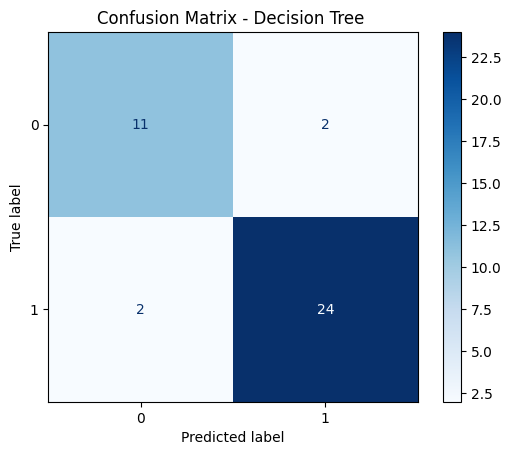

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_dt_smote)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])  # 0 = Healthy, 1 = Parkinson's Diseaese
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Decision Tree ")
plt.show()

**XGBoost (eXtreme Gradient Boosting)** is a highly efficient machine learning algorithm based on gradient boosting, designed to create a strong predictive model by combining multiple decision trees, and is widely used for its speed, accuracy, and ability to handle complex structured data effectively.

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_smote_train_scaled, y_smote_train)
y_pred_xgb_smote = xgb.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb_smote)
precision_xgb = precision_score(y_test, y_pred_xgb_smote)
recall_xgb = recall_score(y_test, y_pred_xgb_smote)
f1_score_xgb = f1_score(y_test, y_pred_xgb_smote)

print("Accuracy: ", accuracy_xgb)
print("Precision: ", precision_xgb)
print("Recall: ", recall_xgb)
print("F1 Score: ", f1_score_xgb)


Accuracy:  0.9230769230769231
Precision:  0.9259259259259259
Recall:  0.9615384615384616
F1 Score:  0.9433962264150944


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


model5 = AdaBoostClassifier(n_estimators=50)

model5.fit(X_smote_train_scaled, y_smote_train)


predictions = model5.predict(X_test_scaled)


test_data_accuracy = accuracy_score(y_test, predictions)
print('Accuracy of the test data : ', test_data_accuracy)

test_data_accuracy * 100


Accuracy of the test data :  0.8205128205128205


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


82.05128205128204

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9]
}

# Set up GridSearchCV with cross-validation (cv=5) and scoring by accuracy
grid_search = GridSearchCV(KNN, param_grid, scoring='precision', cv=5)

# Fit the grid search on the training data
grid_search.fit(X_smote_train_scaled, y_smote_train)

# Print the best parameters and the best score (accuracy)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'n_neighbors': 5}
Best Score:  0.9789473684210528


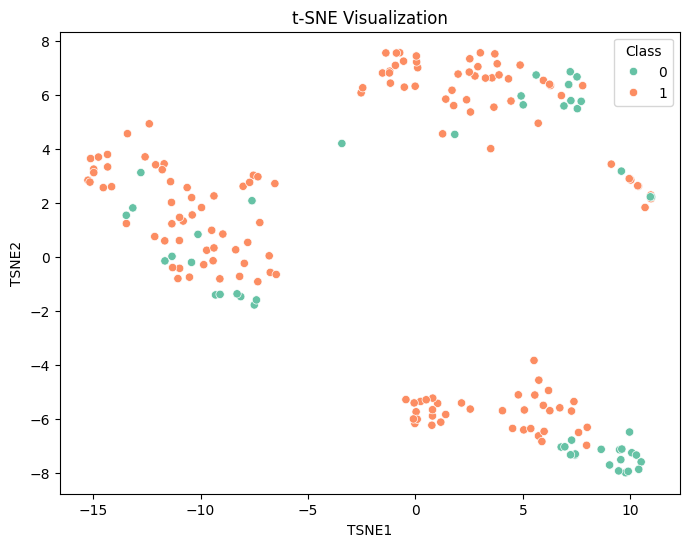

In [ ]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()
